<a href="https://colab.research.google.com/github/dianamelinte23/dog-breed-identification/blob/master/dog_breed_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-end Multi-class Dog Breed Classification
This notebook builds an end-to end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub.

## 1. Problem
Identifying the breed of a dog given an image of a dog

## 2. Data
The data is from Kaggle's dog breed identification competition:
https://www.kaggle.com/c/dog-breed-identification/data
## 3. Evaluation
The evaluation is a file with prediction probabilities for each dog breed of each test image. 
https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features
Some information about the data;
* We're dealing with images (unstructured data) so it's best to use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set (this images have labels)
* There are around 10,000+ images in the test set (this images have no labels, because we'll predict them )

In [1]:
# Unzip the uploaded data into Google Drive
#!unzip "/content/drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "/content/drive/MyDrive/Dog Vision/"

## Get the workspace ready

In [2]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__ )
print("TF Hub version:", hub.__version__)

#Check for GPU availability
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

TF version: 2.4.1
TF Hub version: 0.11.0
GPU available


## Getting our data ready, turn it into Tensors (numerical representations)

In [3]:
# Checkout the labels 
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     a0581987fa74f323e695331abfd4537f  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [4]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


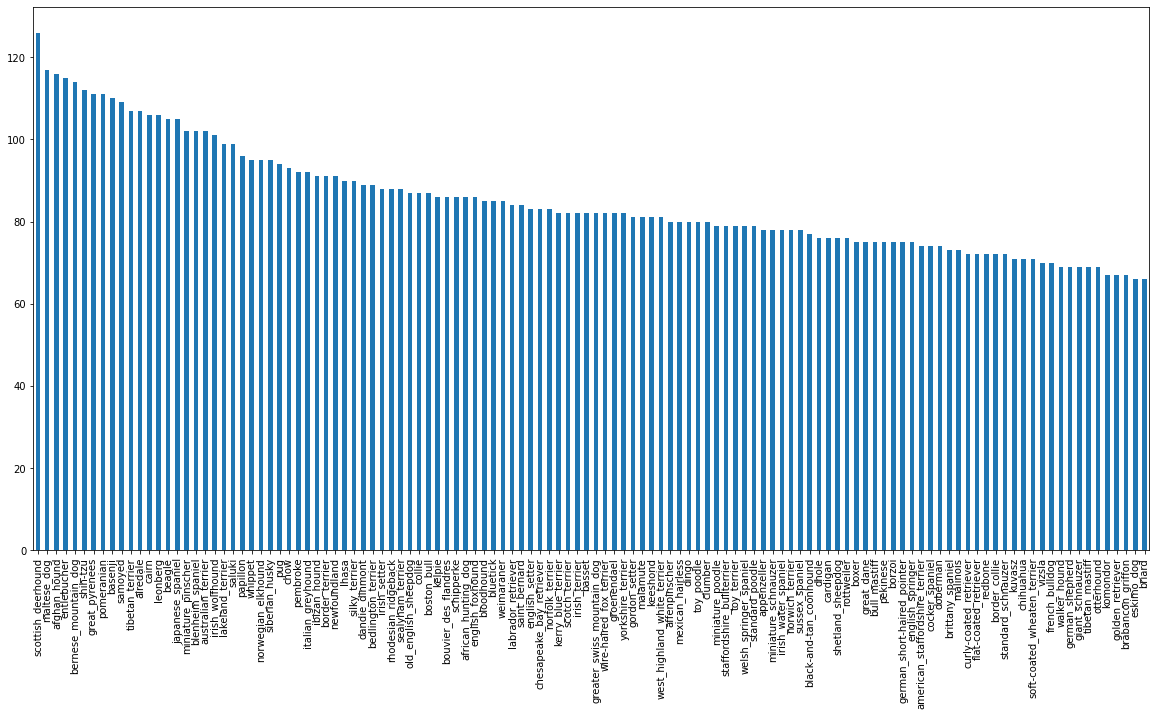

In [5]:
# Images of each breed
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10));

In [6]:
labels_csv["breed"].value_counts().median()

82.0

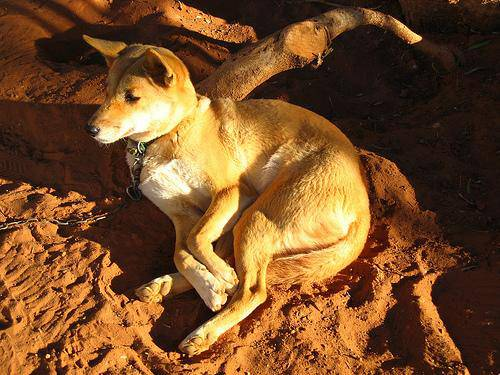

In [7]:
# View images
from IPython.display import Image
Image("drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

#Getting images and their labels
List of all images and pathnames

In [8]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [9]:
# Create a list of pathnames from image ID's
filenames = ["drive/My Drive/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]
filenames[:5]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [10]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("drive/MyDrive/Dog Vision/train"))==len(filenames):
  print("Filenames match actual amount of files.")
else:
  print("Filenames do not match actual amount of files.")

Filenames match actual amount of files.


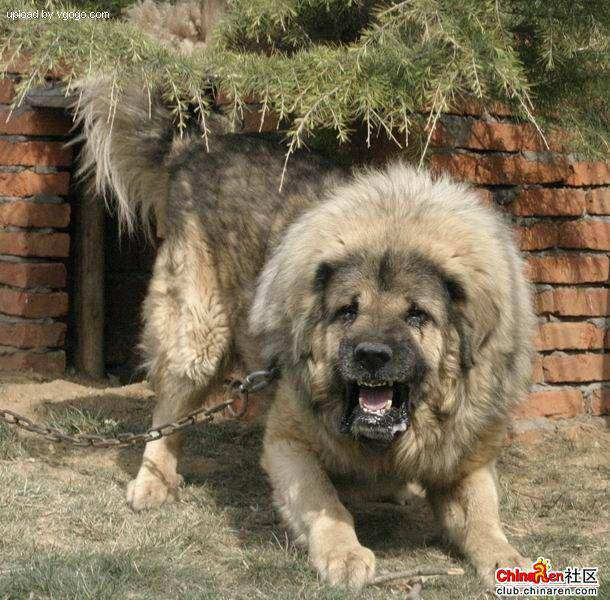

In [11]:
Image(filenames[9000])

In [12]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [13]:
# Preparing labels
import numpy as np
labels = labels_csv["breed"].to_numpy()
#labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [14]:
len(labels)

10222

In [15]:
# Checking if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames.")
else:
  print("Number of labels doesn't match number of filenames!")


Number of labels matches number of filenames.


In [16]:
# Find the unique labels values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [17]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [18]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [19]:
len(boolean_labels)

10222

In [20]:
# Turning one value of boolean array into integer
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) #index where label occurs
print(boolean_labels[0].argmax()) # index where labels occurs in boolean array
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating a validation set

Going to start off experimenting with ~1000 images and increase as needed

In [21]:
# Setup X & y
X = filenames
y = boolean_labels

In [22]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}


In [23]:
# Split the data into train and validation sets of total size NUM_IMAGES
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split (X[:NUM_IMAGES], 
                                                   y[:NUM_IMAGES], 
                                                   test_size = 0.2, 
                                                   random_state=42)
len(X_train), len(y_train), len(X_val), len(y_val)


(800, 800, 200, 200)

In [24]:
X_train[:5], y_train[:2]

(['drive/My Drive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/Dog Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/Dog Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, Fa

## Preprocessing images (turning images into Tensors)
Writing a function which does the following:
1. Take an image filepath as input
2. Use TF to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our image (convert colour channel from 0-255 to 0-1)
5. Resize the `image` to be a shape of (224, 224)
6. Return the modified image

In [25]:
# Convert an image to a NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [26]:
#Define image size
IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image filepath and turns the image into a Tensor.
  """
  # Read in a image file
  image = tf.io.read_file(image_path) #img_size = IMG_SIZE
  # Turn the jpg image into numerical Tensor with 3 colour channels (RGB)
  image = tf.image.decode_jpeg(image, channels=3)
  #Convert the colour channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32) #normalization
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image



## Turning data into batches
* Batch size = 32
* Tensor tuples `(image, label)`

In [27]:
# Creating a function which returns a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [28]:
# Turn all the data, X & y, into batches
BATCH_SIZE = 32

def create_data_batches(X, y = None, batch_size = BATCH_SIZE, valid_data = False, test_data=None):
  """
  Create batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data, but doesn't if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we'll not have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) #only filepaths (no labels)
    data_batch = data.map_fn(process_image).batch(BATCH_SIZE)
    return data_batch
   
   # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
     print("Creating validation data batches...")
     data = tf.data.Dataset.from_tensor_slices((tf.constant(X), #filepaths
                                                tf.constant(y))) #labels
     data_batch = data.map(get_image_label).batch(BATCH_SIZE)
     return data_batch
    
  else:
      print("Creating training data batches...")
      # Turn filepaths and labels into Tensors
      data = tf.data.Dataset.from_tensor_slices((tf.constant(X),  #filepaths
                                                 tf.constant(y))) #labels
      #Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
      data = data.shuffle(buffer_size = len(X))

      # Create (image, label) tuples (this also turns the image path into a preprocessed image)
      data = data.map(get_image_label)

      # Turn the training data into batches
      data_batch = data.batch(BATCH_SIZE)

  return data_batch






In [29]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data = True)

Creating training data batches...
Creating validation data batches...


In [30]:
#Check out the differennt attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

In [39]:
import matplotlib.pyplot as plt

#Create a function for viewing images in a data batches
def show_25_labels(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  plt.figure(figsize = (12,10))
  for i in range(25):
    #Create subplot (5 rows and 5 columns)
    ax = plt.subplot(5,5, i+1)
    #Display an image
    plt.imshow(images[i])
    #Add image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")
  

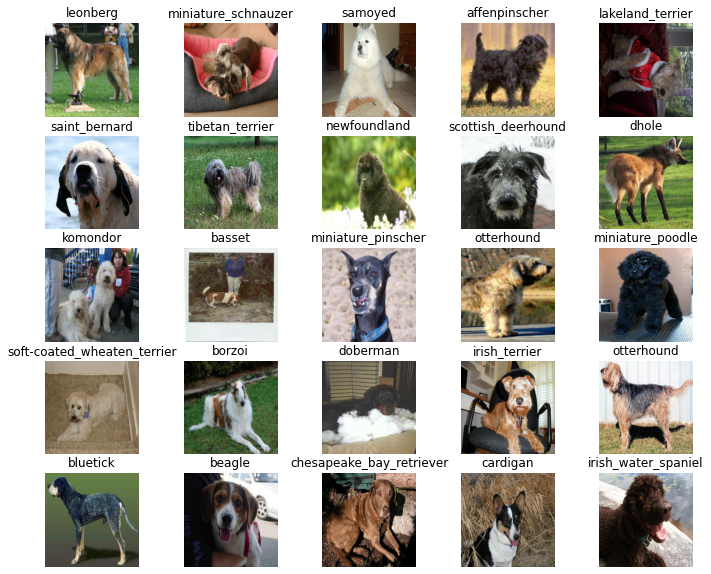

In [49]:
# Visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_labels(train_images, train_labels)

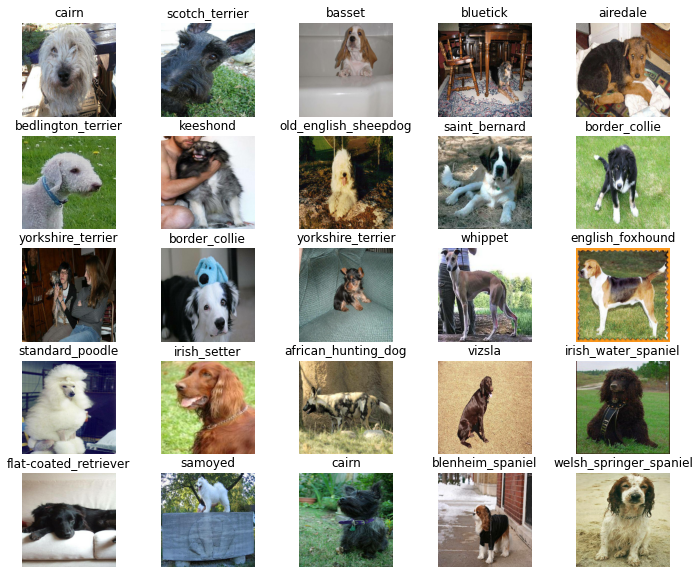

In [48]:
# Validation set doesn't shuffle
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_labels(val_images, val_labels)